In [ ]:

import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from google.colab import drive

drive.mount('/content/drive')

zip_path = "/content/drive/MyDrive/Data.zip"
extract_path = "/content/Data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


Mounted at /content/drive


Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.
Found 28 images belonging to 28 classes.
✅ Loaded 69600 training samples
✅ Loaded 17400 validation samples
✅ Loaded 28 test samples


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     8,667,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 29)             │         3,741 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,764,253 (33.43 MB)

 Trainable params: 8,764,253 (33.43 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2175/2175 ━━━━━━━━━━━━━━━━━━━━ 127s 55ms/step - accuracy: 0.4275 - loss: 1.9018 - val_accuracy: 0.7148 - val_loss: 0.9109
Epoch 2/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 140s 64ms/step - accuracy: 0.8712 - loss: 0.3669 - val_accuracy: 0.7432 - val_loss: 0.8404
Epoch 3/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 139s 63ms/step - accuracy: 0.9256 - loss: 0.2095 - val_accuracy: 0.7314 - val_loss: 1.1310
Epoch 4/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 118s 54ms/step - accuracy: 0.9485 - loss: 0.1474 - val_accuracy: 0.7506 - val_loss: 0.9473
Epoch 5/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 112s 51ms/step - accuracy: 0.9584 - loss: 0.1189 - val_accuracy: 0.7461 - val_loss: 0.9838
Epoch 6/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 134s 62ms/step - accuracy: 0.9673 - loss: 0.0965 - val_accuracy: 0.7741 - val_loss: 1.0289
Epoch 7/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 112s 52ms/step - accuracy: 0.9710 - loss: 0.0861 - val_accuracy: 0.7767 - val_loss: 1.0677
Epoch 8/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 134s 62ms/step - accuracy: 0.9745 - lo

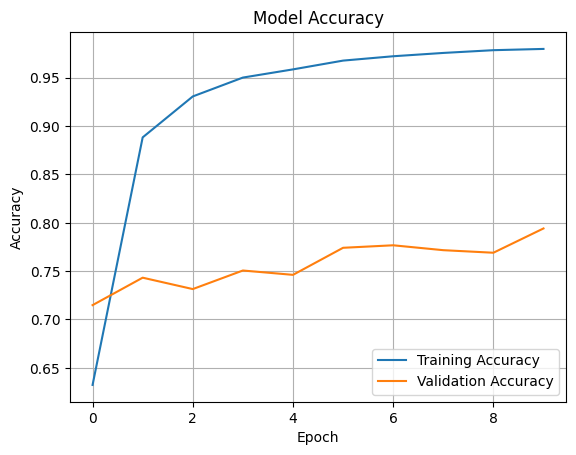

✅ Model saved at /content/drive/MyDrive/sign_model1.h5


In [2]:

IMAGE_SIZE = (200, 200)
BATCH_SIZE = 32
EPOCHS = 10

train_dir = os.path.join(extract_path, "Data/train")
test_dir = os.path.join(extract_path, "Data/test")

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

if test_generator.samples == 0:
    raise ValueError("🚨 Test directory is empty or incorrectly structured.")

print(f"✅ Loaded {train_generator.samples} training samples")
print(f"✅ Loaded {val_generator.samples} validation samples")
print(f"✅ Loaded {test_generator.samples} test samples")

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Save model
model_save_path = '/content/drive/MyDrive/sign_model1.h5'
model.save(model_save_path)
print(f"✅ Model saved at {model_save_path}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
Image: G_test.jpg
Prediction: G (Confidence: 1.00)


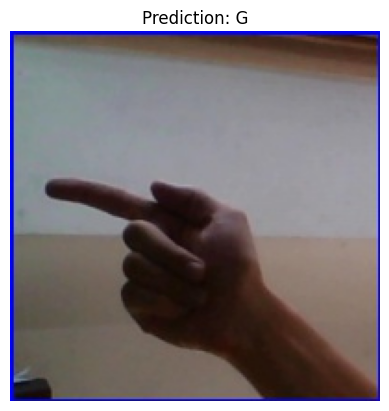

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Image: F_test.jpg
Prediction: F (Confidence: 1.00)


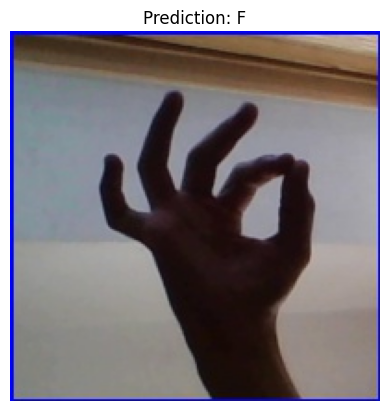

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Image: V_test.jpg
Prediction: V (Confidence: 1.00)


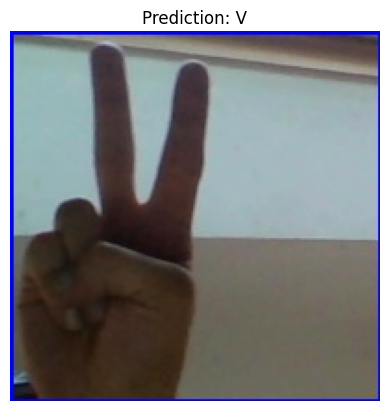

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Image: Screenshot from 2025-04-26 09-38-31.png
Prediction: L (Confidence: 0.98)


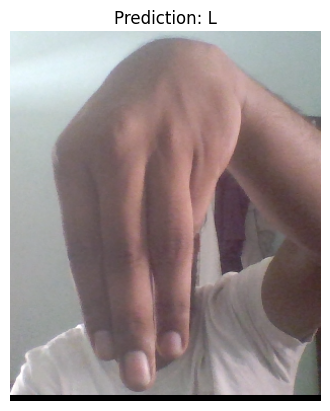

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Image: O_test.jpg
Prediction: O (Confidence: 1.00)


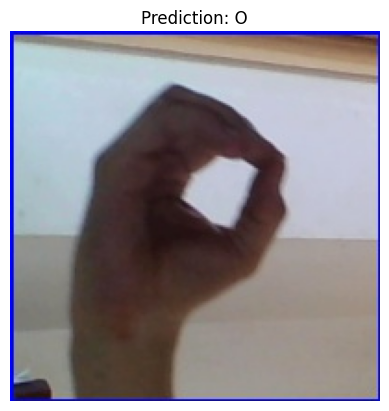

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Image: Screenshot from 2025-04-27 20-57-28.png
No sign detected. Confidence: 0.11


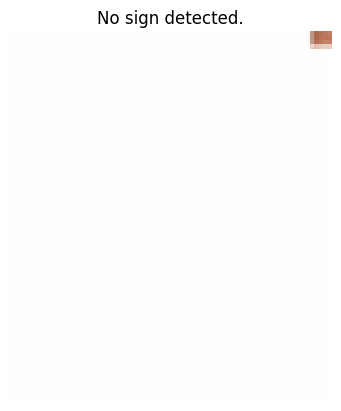

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Image: L_test.jpg
Prediction: L (Confidence: 1.00)


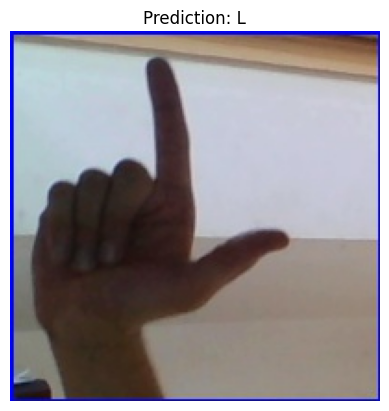

In [4]:


#model_save_path = '/content/drive/MyDrive/sign_model1.h5'
model = tf.keras.models.load_model(model_save_path)

class_labels = list(train_generator.class_indices.keys())

def predict_image(img_path):
    img = image.load_img(img_path, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    predicted_idx = np.argmax(predictions, axis=1)[0]
    predicted_label = class_labels[predicted_idx]
    return predicted_label, np.max(predictions)

image_folder_path = '/content/'
confidence_threshold = 0.5

for img_name in os.listdir(image_folder_path):
    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(image_folder_path, img_name)
        predicted_class, confidence = predict_image(img_path)

        img = image.load_img(img_path)
        plt.imshow(img)
        plt.axis('off')

        if confidence < confidence_threshold:
            title_text = "No sign detected."
            print(f"Image: {img_name}\nNo sign detected. Confidence: {confidence:.2f}")
        else:
            title_text = f"Prediction: {predicted_class}"
            print(f"Image: {img_name}\nPrediction: {predicted_class} (Confidence: {confidence:.2f})")

        plt.title(title_text)
        plt.show()
